# "Gender."

### _"Classifying gender based on personal preferences" (Binary classification task)._

## Table of Contents


## Part 0: Introduction

### Overview
The dataset that we see here contains 5 columns and 66 entries of data about personal preferences based on gender.

Gender is a social construct. The way males and females are treated differently since birth moulds their behaviour and personal preferences into what society expects from their gender.

**Метаданные:**
    
* **Favorite Color** - Favorite color (colors reported by respondents were mapped to either warm, cool or neutral)
 
* **Favorite Music Genre** - Favorite broad music genre

* **Favorite Beverage** - Favorite alcoholic drink

* **Favorite Soft Drink** - Favorite fizzy drink

* **Gender** - Binary gender 



### Questions:
    
Predict a person's gender based on their personal preferences (check balance of classes; calculate perdictions)


## [Part 1: Import, Load Data](#Part-1:-Import,-Load-Data.)
* ### Import libraries, Read data from ‘.csv’ file

## [Part 2: Exploratory Data Analysis](#Part-2:-Exploratory-Data-Analysis.)
* ### Info, Head
* ### Rename Columns
* ### Columns visualisation
* ### 'gender' attribute value counts 
* ### Encode the Data

## [Part 3: Data Wrangling and Transformation](#Part-3:-Data-Wrangling-and-Transformation.)
* ### Creating datasets for ML part
* ### 'Train\Test' splitting method

## [Part 4: Machine Learning](#Part-4:-Machine-Learning.)
* ### Build, train and evaluate model 
    * #### Logistic Regression
    * #### Visualisation of predictions
    * #### Classification report
    * #### Confusion Matrix
    * #### ROC-AUC score

## [Conclusion](#Conclusion.)


## Part 1: Import, Load Data.

* ### Import libraries

In [3]:
# import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

* ### Read data from ‘.csv’ file

In [4]:
# read data from '.csv' file
df = pd.read_csv("gender.csv")

## Part 2: Exploratory Data Analysis.

* ### Info

In [5]:
# print the full summary of the dataset  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
Favorite Color          66 non-null object
Favorite Music Genre    66 non-null object
Favorite Beverage       66 non-null object
Favorite Soft Drink     66 non-null object
Gender                  66 non-null object
dtypes: object(5)
memory usage: 2.7+ KB


Dataset consists of 66 rows and 5 columns;

has 1 datatype: object(5);

has no missing values.

* ### Head

In [8]:
# preview of the first 5 lines of the loaded data 
df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


* ### Rename Columns

In [11]:
# columns rename
df.columns = ['color', 'music', 'beverage', 'soft_drink', 'gender']
df.columns

Index(['color', 'music', 'beverage', 'soft_drink', 'gender'], dtype='object')

* ### Columns visualisation

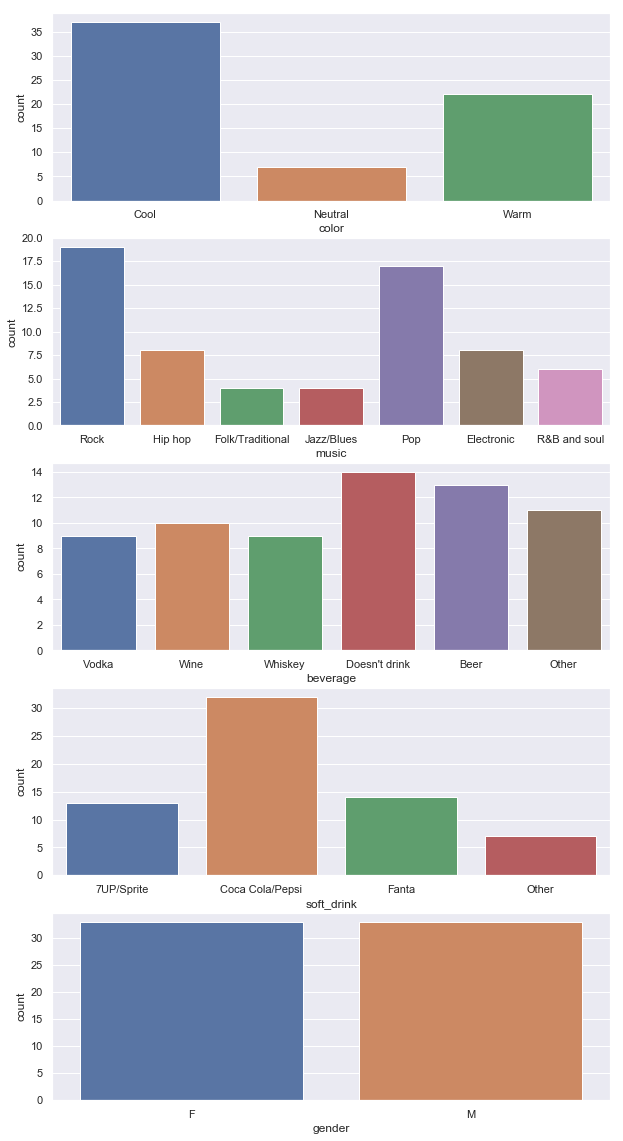

In [29]:
# columns visualisation
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10,20))
for i in range(len(df.columns)):
    sns.countplot(data=df, x=df.iloc[:,i], ax=axes[i])

* ### 'gender' attribute value counts 

In [33]:
# 'gender' value counts 
df['gender'].value_counts()

M    33
F    33
Name: gender, dtype: int64

There are 33 of 'Female' and 33 of 'Male' in our dataset. This means that our dataset is balanced.

* ### Encode the Data

In [36]:
# # label encoding
# le_encoder = LabelEncoder()
# data=df
# data['color'] = le_encoder.fit_transform(df.color.values)
# #le_music = LabelEncoder()
# data['music'] = le_encoder.fit_transform(df.music.values)
# data['beverage'] = le_encoder.fit_transform(df.beverage.values)
# data['soft_drink'] = le_encoder.fit_transform(df.soft_drink.values)
# data['gender'] = le_encoder.fit_transform(df.gender.values)
# data.head()

,color,music,beverage,soft_drink,gender
0,0,6,3,0,0
1,1,2,3,1,0
2,2,6,5,1,0
3,2,1,4,2,0
4,0,6,3,1,0


In [46]:
# label encoding
'''Encoding labels of every column of our dataset'''
le_encoder = LabelEncoder()
data=df
for col in df.columns:
    data[col] = le_encoder.fit_transform(df[col].values)
    
data.head()

,color,music,beverage,soft_drink,gender
0,0,6,3,0,0
1,1,2,3,1,0
2,2,6,5,1,0
3,2,1,4,2,0
4,0,6,3,1,0


## Part 3: Data Wrangling and Transformation.

* ### Creating datasets for ML part

In [65]:
# set 'X' for features' and y' for the target ('gender').
X = data.drop(['gender'], axis=1)
y = data['gender']

* ### 'Train\Test' split

In [67]:
# 'Train\Test' splitting method
X_train, X_test,  y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

## Part 4: Machine Learning.

* ### Build, train and evaluate model

### Logistic Regression

In [69]:
# Logistic Regression model
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

In [70]:
# LR predictions
LR_pred

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
      dtype=int64)

### Decision Tree Classifier

In [99]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)
DTC_pred = DTC.predict(X_test)

In [100]:
DTC_pred

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1],
      dtype=int64)

* ### Visualisation of predictions for Logistic Regression

In [74]:
# visual comparison between Actual 'Gender' and Predicted 'Gender'
actualvspredicted = pd.DataFrame({'Actual Gender': y_test, "LR Predicted Gender": LR_pred})
actualvspredicted.head(10).style.background_gradient(cmap="Purples")

,Actual Gender,LR Predicted Gender
45,1,1
28,0,1
29,0,1
55,1,1
63,1,1
31,0,0
51,1,0
46,1,0
34,1,0
4,0,0


* ### Visualisation of predictions for Decision Tree Classifier

In [101]:
# visual comparison between Actual 'Gender' and Predicted 'Gender'
actualvspredicted = pd.DataFrame({'Actual Gender': y_test, "LR Predicted Gender": DTC_pred})
actualvspredicted.head(10).style.background_gradient(cmap="Greens")

,Actual Gender,LR Predicted Gender
45,1,1
28,0,0
29,0,1
55,1,1
63,1,1
31,0,0
51,1,1
46,1,0
34,1,1
4,0,1


* ### Classification report for Logistic Regression

In [75]:
# classification report of LR model
print("LR Classification Report: \n", classification_report(y_test, LR_pred, digits=6))

LR Classification Report: 
               precision    recall  f1-score   support

           0   0.538462  0.777778  0.636364         9
           1   0.714286  0.454545  0.555556        11

   micro avg   0.600000  0.600000  0.600000        20
   macro avg   0.626374  0.616162  0.595960        20
weighted avg   0.635165  0.600000  0.591919        20



* ### Classification report for Decision Tree Classifier

In [102]:
# classification report of LR model
print("DTC Classification Report: \n", classification_report(y_test, DTC_pred, digits=6))

DTC Classification Report: 
               precision    recall  f1-score   support

           0   0.800000  0.444444  0.571429         9
           1   0.666667  0.909091  0.769231        11

   micro avg   0.700000  0.700000  0.700000        20
   macro avg   0.733333  0.676768  0.670330        20
weighted avg   0.726667  0.700000  0.680220        20



* ### Confusion matrix for Logistic Regression

LR Confusion Matrix


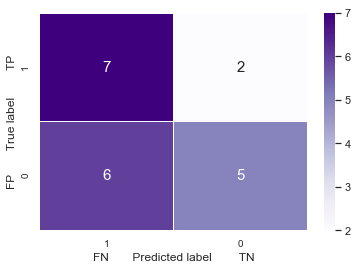

In [92]:
# confusion matrix of LR model
LR_confusion_mx = confusion_matrix(y_test, LR_pred)
print('LR Confusion Matrix')

# visualisation
ax = plt.subplot()
sns.heatmap(LR_confusion_mx, annot=True, fmt='d', cmap="Purples", ax=ax, linewidths=0.5, annot_kws={'size':15})
ax.set_ylabel('FP       True label        TP')
ax.set_xlabel('FN       Predicted label        TN')
ax.xaxis.set_ticklabels(['1', '0'], fontsize=10)
ax.yaxis.set_ticklabels(['1', '0'], fontsize=10)
plt.show()

* ### Confusion matrix for Decision Tree Classifier

DTC Confusion Matrix


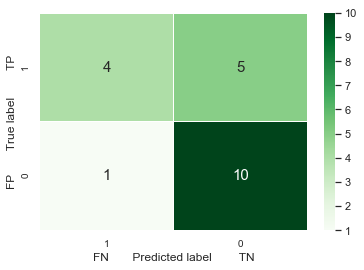

In [109]:
# confusion matrix of LR model
DTC_confusion_mx = confusion_matrix(y_test, DTC_pred)
print('DTC Confusion Matrix')

# visualisation
ax = plt.subplot()
sns.heatmap(DTC_confusion_mx, annot=True, fmt='d', cmap="Greens", ax=ax, linewidths=0.5, annot_kws={'size':15})
ax.set_ylabel('FP       True label        TP')
ax.set_xlabel('FN       Predicted label        TN')
ax.xaxis.set_ticklabels(['1', '0'], fontsize=10)
ax.yaxis.set_ticklabels(['1', '0'], fontsize=10)
plt.show()

* ### ROC-AUC score for Logistic Regression

In [103]:
# ROC-AUC score of LR model
roc_auc_score(LR_pred, y_test)

0.6263736263736264

* ### ROC-AUC score for Decision Tree Classifier

In [110]:
# ROC-AUC score of DTC model
roc_auc_score(DTC_pred, y_test)

0.7333333333333333

##  Conclusion.

**The main question** was: Predict a person's gender based on their personal preferences (check balance of classes; calculate perdictions).

**Answers**: 

1. The data is too small. Only 66 instances.

2. The classes are balanced.

3. Logistic Regression and Decision Tree Classifier models were choosen for the experiment. Predictions (with visual comparison) were done with an accuracy of model equal 0.63, 0.73 respectively, no hyper parameters were applied.